# Homework 2-1

Diabetes Linear Regression example

a. 	Carry out the Linear Regression example on the SKLearn website at http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#example-linear-model-plot-ols-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


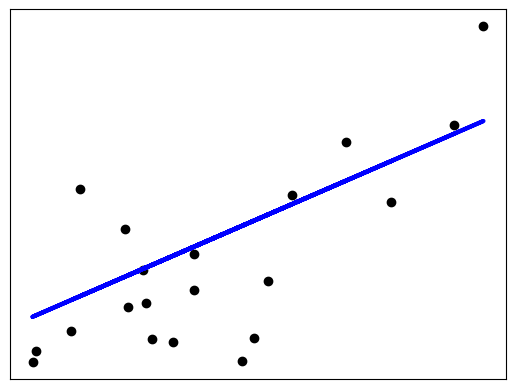

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

b. Using the same data source, calculate the coefficients, residual sum of squares, and variance score for all features in the diabetes dataset. Compare the variance explained by the model in part a to that in part b and comment on how much additional predictive power you get by adding extra explanatory variables.

In [3]:
from sklearn.metrics import explained_variance_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

# train and test sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

lr = linear_model.LinearRegression()
lr.fit(diabetes_X_train, diabetes_y_train)

# prediction
diabetes_y_pred = lr.predict(diabetes_X_test)

In [4]:
print("Coefficients: \n")
for i in lr.coef_:
    print("", i)
    
    
print("\nMean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

print("Residuals sum of squares: %.2f" % np.sum(np.square(diabetes_y_test - diabetes_y_pred)))

print("Variance score: %.2f" % explained_variance_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 

 0.30609424754207604
 -237.63557011300682
 510.53804765114137
 327.7298779909886
 -814.1119263534517
 492.7995945034054
 102.84123996793114
 184.60349609037092
 743.5093875957095
 76.09664636971928

Mean squared error: 2004.52
Coefficient of determination: 0.59
Residuals sum of squares: 40090.37
Variance score: 0.63


c. Split the data into 10 “folds” of equal size. For each fold, calculate the coefficients, residual sum of squares, and variance score for all features.

In [ ]:
diabetes_X.shape

(442, 10)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
variance_score = []
i = 1

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

diabetes_X, diabetes_y = diabetes_X[:440], diabetes_y[:440]

kfold = KFold(n_splits = 10, random_state = 1, shuffle = True)
lr = linear_model.LinearRegression()


In [ ]:
for train, test in kfold.split(diabetes_X):
  lr.fit(diabetes_X[train], diabetes_y[train])
  y_pred = lr.predict(diabetes_X[test])

  print("for", i , "th fold: \n")
  print("Coefficients: \n", lr.coef_)

  print("Residuals sum of squares: %.2f" % np.sum(np.square(diabetes_y[test] - y_pred)))
  print("Variance scoe: %.2f\n\n" % explained_variance_score(diabetes_y[test], y_pred))
  variance_score.append(explained_variance_score(diabetes_y[test], y_pred))

  i+=1

for 1 th fold: 

Coefficients: 
 [-3.24300064e-01 -2.40354509e+02  5.00790472e+02  3.34383300e+02
 -6.32323955e+02  3.65467477e+02  1.10189269e+01  1.48379379e+02
  6.78708628e+02  5.65540377e+01]
Residuals sum of squares: 105773.03
Variance scoe: 0.61


for 2 th fold: 

Coefficients: 
 [ -37.44034531 -229.36679255  537.51919488  318.75692336 -830.35602608
  473.73416418  148.4262956   219.81413367  727.8438223    97.25746224]
Residuals sum of squares: 109903.47
Variance scoe: 0.57


for 3 th fold: 

Coefficients: 
 [  -7.20268831 -215.31677418  508.80181869  315.28052537 -615.03647785
  292.28958907   80.93253049  247.532692    708.97693855   83.15129731]
Residuals sum of squares: 133760.30
Variance scoe: 0.41


for 4 th fold: 

Coefficients: 
 [    2.10508312  -244.85882365   513.56176441   321.2670188
 -1018.53367865   631.25871119   227.99529142   261.5715686
   815.98130296    96.22014052]
Residuals sum of squares: 134316.79
Variance scoe: 0.25


for 5 th fold: 

Coefficients: 
 [

d. 	. What is the range of variance score generated using 10-fold cross-validation? What is the average variance score generated? What is the standard deviation of the variance scores? Fit all of the data using a regression model, and calculate the resulting coefficients, mean-squared error, and variance score.  How does the average variance score across 10-fold cross-validation compare to the score generated when fitting all of the data? What can we conclude about the data based on these results?

In [ ]:
print("Range of variance score: ", max(variance_score) - min(variance_score))
print("Average variance score: ", max(variance_score)/len(variance_score))
print("Sandard deviation of the variance score: ", np.std(variance_score))

Range of variance score:  0.36671750572214146
Average variance score:  0.061322854936977464
Sandard deviation of the variance score:  0.10669591046856611


In [5]:
from sklearn.metrics import explained_variance_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

lr = linear_model.LinearRegression()

lr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = lr.predict(diabetes_X_test)

print("Coefficients: \n")
for i in lr.coef_:
    print("", i)

print("\nMean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

print("Residuals sum of squares: %.2f" % np.sum(np.square(diabetes_y_test - diabetes_y_pred)))

print("Variance score: %.2f" % explained_variance_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 

 0.30609424754207604
 -237.63557011300682
 510.53804765114137
 327.7298779909886
 -814.1119263534517
 492.7995945034054
 102.84123996793114
 184.60349609037092
 743.5093875957095
 76.09664636971928

Mean squared error: 2004.52
Coefficient of determination: 0.59
Residuals sum of squares: 40090.37
Variance score: 0.63


Average score of k fold is 0.48 while the variance score is 0.63 which the figure is higher with one fitting all data. THe results show different variance score which we can conclude the model generalize better when it fits on all data.